<a href="https://colab.research.google.com/github/Chirag314/Feature-Engineering/blob/main/Feature_Engineering_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about practicing feature engineering from book'Python Feature Engineering Cookbook'

Download titanic data.

In [1]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
  try:
    return row.split()[0]
  except:
    return np.nan
url="https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data=pd.read_csv(url)
data=data.replace('?',np.nan)
data['cabin']=data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv',index=False)

In [2]:
#Check all data types of Titanic data
import matplotlib.pyplot as plt
data=pd.read_csv('titanic.csv')
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [3]:
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [4]:
#lets check first few values of variable 'fare'
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [5]:
#Also check 'embark' and 'cabin' variables
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [6]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


<Axes: >

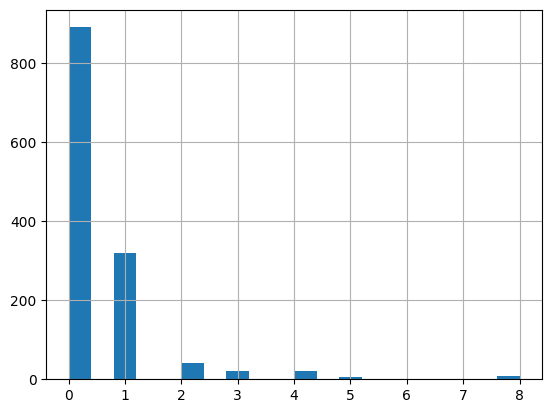

In [7]:
#Check 'sibsp' varible using histogram
data['sibsp'].hist(bins=20)

<Axes: >

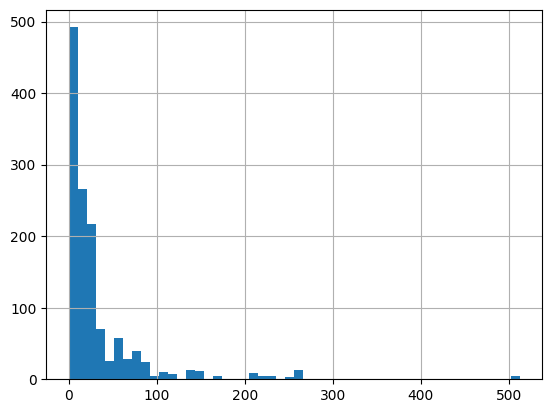

In [8]:
#Check 'fare' variable
data['fare'].hist(bins=50)

Check KDD data

In [9]:
cols=['AGE' ,'NUMCHLD', 'INCOME','WEALTH1','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML' ,'MAGFEM','MAGMALE']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [10]:
#CHECK MISSING DATA
print(data.shape)
data.isnull().sum()

(8537, 11)


AGE         2059
NUMCHLD     7402
INCOME      1847
WEALTH1     3906
MBCRAFT     4627
MBGARDEN    4627
MBBOOKS     4627
MBCOLECT    4633
MAGFAML     4627
MAGFEM      4627
MAGMALE     4627
dtype: int64

All variables have lot of missing values, 'NUMCHLD' has 80 % of missing values.

In [11]:
data.isnull().mean()

AGE         0.241185
NUMCHLD     0.867049
INCOME      0.216352
WEALTH1     0.457538
MBCRAFT     0.541994
MBGARDEN    0.541994
MBBOOKS     0.541994
MBCOLECT    0.542696
MAGFAML     0.541994
MAGFEM      0.541994
MAGMALE     0.541994
dtype: float64

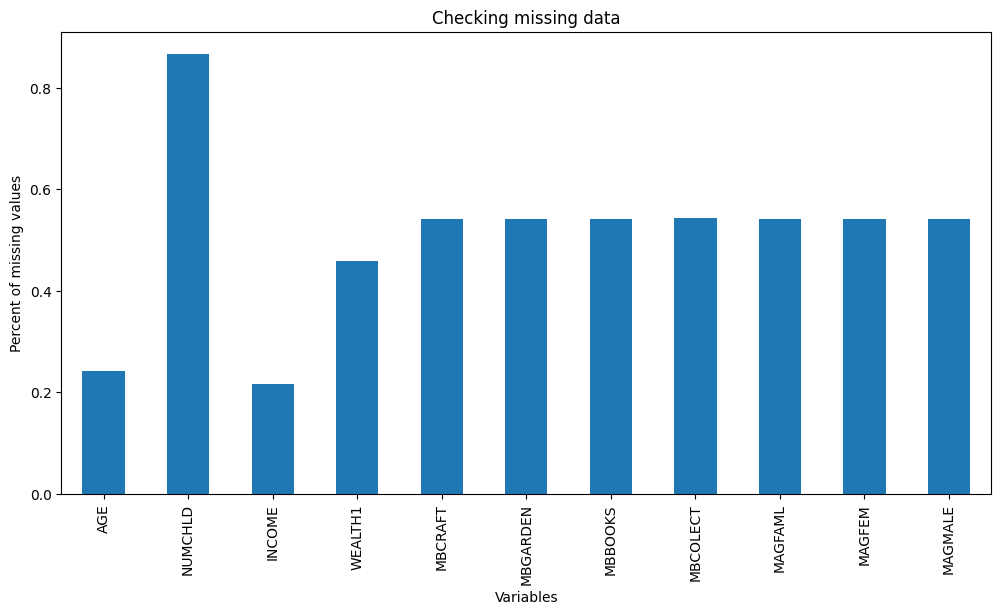

In [12]:
#draw histogram of percent missisng values
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percent of missing values')
plt.xlabel('Variables')
plt.title('Checking missing data')
plt.show()

In [13]:
#Check cardinality of categorical data

cols=['GENDER','RFA_2','MDMAUD_A','DOMAIN','RFA_15']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data=data.replace(' ',np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [14]:
#determine number of unique categories in each variable
data.nunique()

DOMAIN      16
GENDER       5
RFA_2       14
RFA_15      31
MDMAUD_A     4
dtype: int64

In [15]:
#print out unique values of 'GENDER' category
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J'], dtype=object)

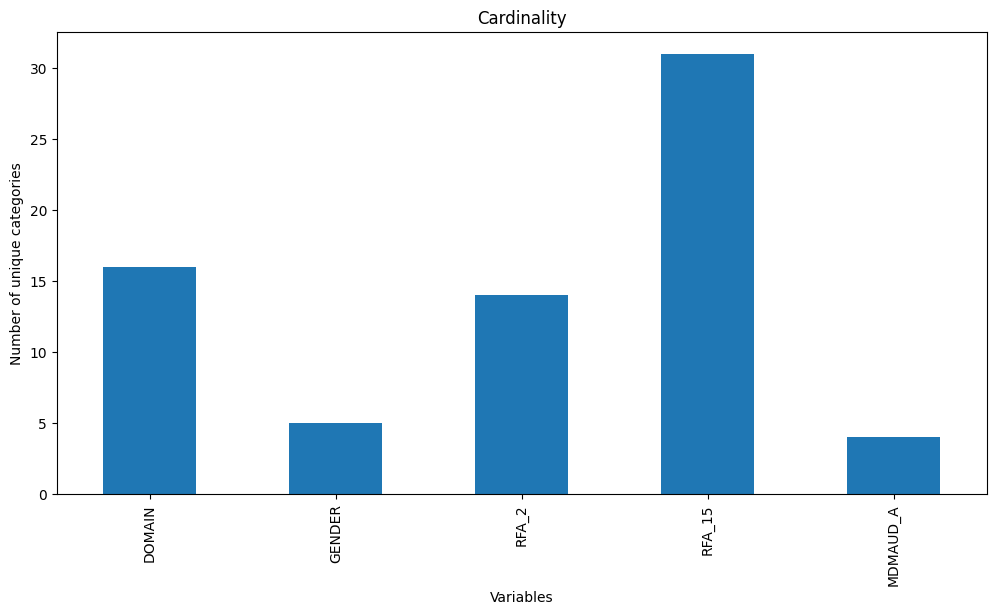

In [16]:
# Make a plot to check cardinality of each variable
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

In [17]:
#Check the rare categories in catagorical data
#use car data
data=pd.read_csv('car.data',header=None)
data.columns=['buying','maint','doors','persons','lug_boot','safety','class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
#display unique categories of the variable 'class'
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


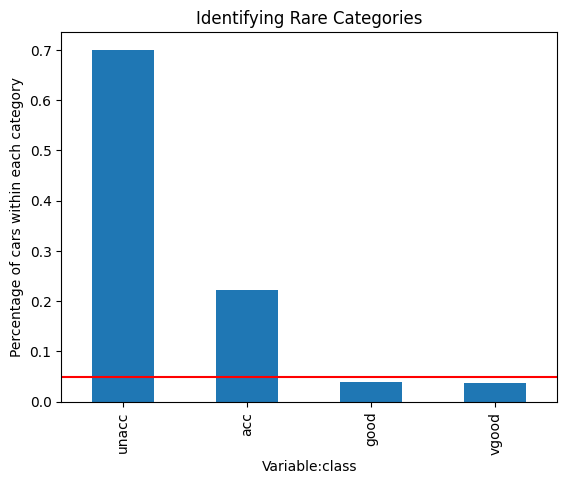

In [19]:
#Check percentage of cars per category
label_freq=data['class'].value_counts()/len(data)
print(label_freq)
fig=label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05,color='red')#highlight 5% mark with red line
fig.set_ylabel('Percentage of cars within each category')
fig.set_xlabel('Variable:class')
fig.set_title('Identifying Rare Categories')
plt.show()

Good and very good categories are present in less than 5% of cars as shown under red line.

In [20]:
#check linear relationship
import seaborn as sns
from sklearn.linear_model import LinearRegression
np.random.seed(24)
x=np.random.random(200)

In [21]:
y=x*13+np.random.random(200)*2

#create dataframe with x and y variables
data=pd.DataFrame([x,y]).T
data.columns=['x','y']


Text(0.5, 28.999999999999986, 'Independent variable')

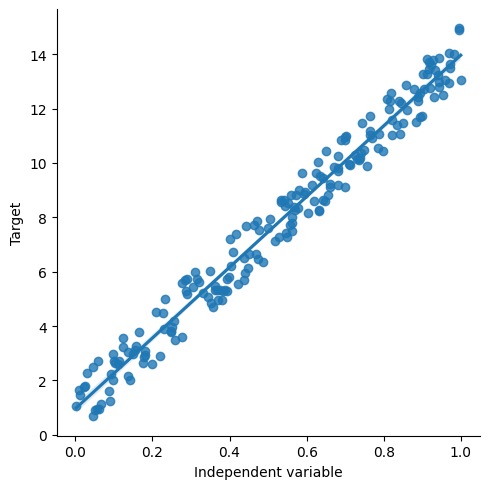

In [22]:
#plot scatter plot to visualize linear relationship
sns.lmplot(x='x',y='y',data=data,order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [23]:
linreg=LinearRegression()
linreg.fit(data['x'].to_frame(),data['y'])

LinearRegression()

In [24]:
predictions=linreg.predict(data['x'].to_frame())
residuals=data['y']-predictions

Text(0.5, 0, 'Independent variable x')

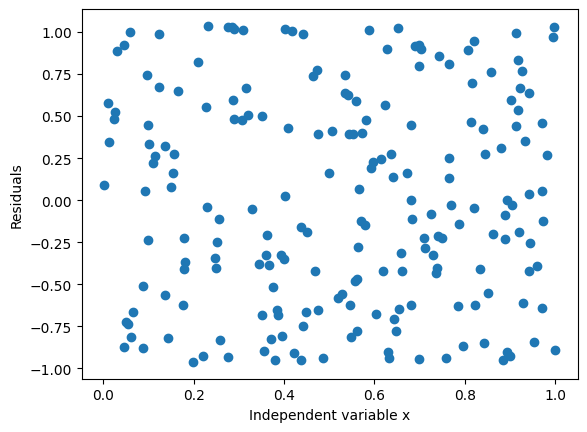

In [25]:
# Maks a scatter plot of independent varibale and residuals
plt.scatter(y=residuals,x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')


<ipython-input-26-2a301738fa26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=30)


Text(0.5, 0, 'Residuals')

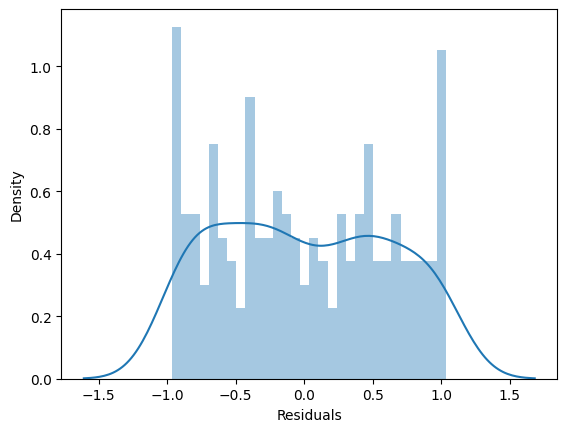

In [26]:
sns.distplot(residuals,bins=30)
plt.xlabel('Residuals')

# Check about normal distribution

<ipython-input-27-d2b50ecb4182>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'],bins=30)


<Axes: xlabel='x', ylabel='Density'>

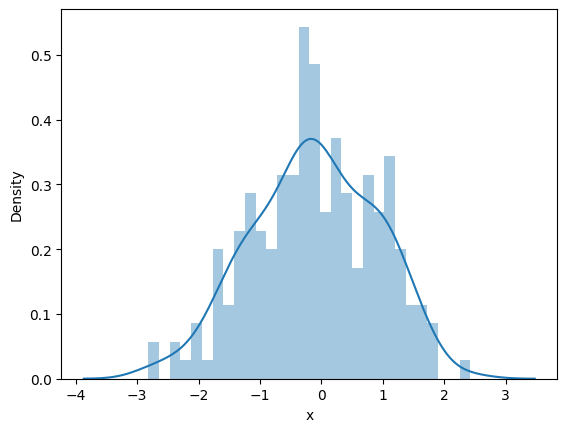

In [27]:
import scipy.stats as stats
x=np.random.randn(200)
data = pd.DataFrame([x]).T
data.columns=['x']
sns.distplot(data['x'],bins=30)


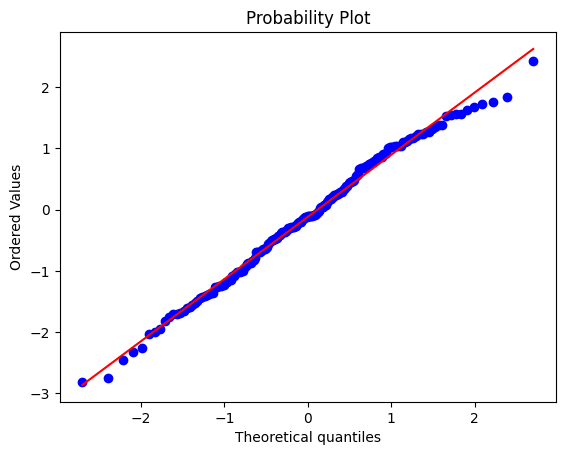

In [28]:
stats.probplot(data['x'],dist='norm',plot=plt)
plt.show()

In [29]:
#Visualize distributions of the variables in a dataset using histograms
from sklearn.datasets import fetch_california_housing
cal_dataset=fetch_california_housing()
cal=pd.DataFrame(cal_dataset.data,columns=cal_dataset.feature_names)

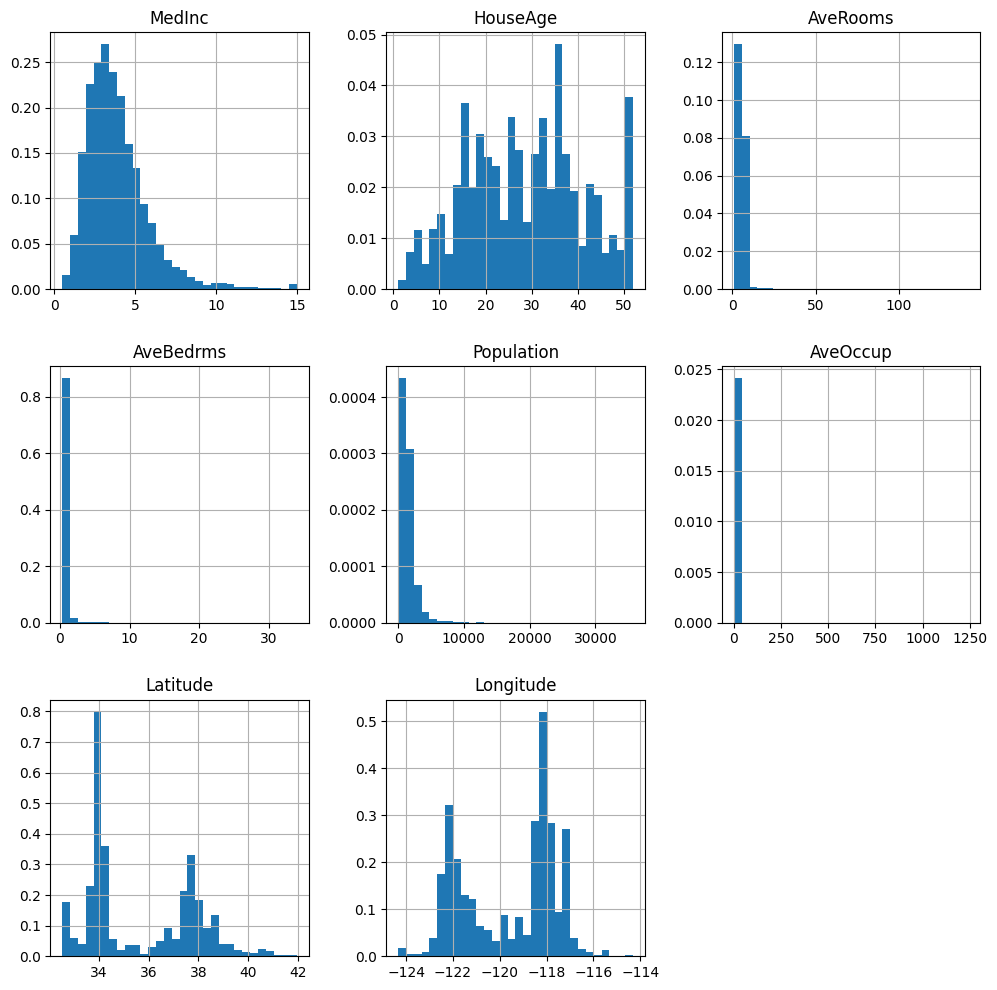

In [30]:
cal.hist(bins=30,figsize=(12,12),density=True)
plt.show()

Missing values imputation techniques

In [31]:
#Credit approval data
import random
data=pd.read_csv('crx.data',header=None)
varnames=['A'+str(s) for s in range(1,17)]
data.columns=varnames

#replace the question mark in the dataset with NaN values
data=data.replace('?',np.nan)

#recast the numerical variables as float data types
data['A2']=data['A2'].astype('float')
data['A14']=data['A14'].astype('float')

In [32]:
#recode the target varibles as binary
data['A16']=data['A16'].map({'+':1,'-':0})

In [33]:
random.seed(42)
values=set([random.randint(0,len(data)) for p in range(0,100)])
for var in ['A3','A8','A9','A10']:
  data.loc[values,var]=np.nan

<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan


In [34]:
data.to_csv('creditApprovalUCI.csv',index=False)

In [35]:
#Lets calculate percentage of missing values for each variable and sort them in ascending order
data.isnull().mean().sort_values(ascending=True)

A11    0.000000
A12    0.000000
A13    0.000000
A15    0.000000
A16    0.000000
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A1     0.017391
A2     0.017391
A14    0.018841
A3     0.130435
A8     0.130435
A9     0.130435
A10    0.130435
dtype: float64

In [36]:
#remove observations with missing data in any of the variable
data_cca=data.dropna()

In [37]:
#compare the results
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 690
Number of observations with complete cases: 565


In [38]:
#Perform mean/median imputation
#Use mean imputation if variables are normally distributed otherwise use median imputations. Mean and median imputations may distort the distribution of the original variables if there is a hig
#percentage of missing data
!pip install feature-engine
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.4 MB/s eta 0:00:00


In [39]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=0)

In [40]:
print(X_train.shape)
print(X_test.shape)

(483, 15)
(207, 15)


In [41]:
X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.149068
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.149068
A9     0.149068
A10    0.149068
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [42]:
#replace missing values with median using the train set and then use this value to replace the missing data in train and test sets
for var in ['A2','A3','A8','A11','A15']:
  value=X_train[var].median()
  X_train[var]=X_train[var].fillna(value)
  X_test[var]=X_test[var].fillna(value)


In [43]:
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11','A15']],data['A16'],test_size=0.3,random_state=0)
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train)
imputer.statistics_

array([28.835,  3.   ,  1.085,  0.   ,  6.   ])

In [44]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [45]:
#Finally lets compute median imputation tranformer using MeanMedianImputer() from feature engine
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11','A15']],data['A16'],test_size=0.3,random_state=0)
median_imputer=MeanMedianImputer(imputation_method='median',variables=['A2','A3','A8','A11','A15'])
median_imputer.fit(X_train)
median_imputer.imputer_dict_


{'A2': 28.835, 'A3': 3.0, 'A8': 1.085, 'A11': 0.0, 'A15': 6.0}

In [46]:
X_train=median_imputer.transform(X_train)
X_test=median_imputer.transform(X_test)
X_train.isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
A15    0.0
dtype: float64

Implementing mode/frequency imputation

In [47]:
from feature_engine.imputation import CategoricalImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=0)


In [48]:
for var in ['A4','A5','A6','A7']:
  values=X_train[var].mode()[0]
  X_train[var]=X_train[var].fillna(values)
  X_test[var]=X_test[var].fillna(values)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(data[['A4','A5','A6','A7']],data['A16'],test_size=0.3,random_state=42)
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
imputer.statistics_

array(['u', 'g', 'c', 'v'], dtype=object)

In [50]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [51]:
mode_imputer=CategoricalImputer(variables=['A4','A5','A6','A7'])
X_train,X_test,y_train,y_test=train_test_split(data[['A4','A5','A6','A7']],data['A16'],test_size=0.3,random_state=42)
mode_imputer.fit(X_train)
mode_imputer.imputer_dict_

{'A4': 'Missing', 'A5': 'Missing', 'A6': 'Missing', 'A7': 'Missing'}

Replacing missing values with an arbitrary number: Arbitrary number imputation can be used when data is not missing at random, when we are building non linear models, and when the percentage of missing data is high. This imputation technique distorts the original vairbale distribution.

In [52]:
from feature_engine.imputation import ArbitraryNumberImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)
X_train[['A2','A3','A8','A11']].max()

A2     76.750
A3     26.335
A8     20.000
A11    67.000
dtype: float64

In [53]:
for var in ['A2','A3','A8','A11']:
  X_train[var].fillna(99,inplace=True)
  X_test[var].fillna(99,inplace=True)
X_train[['A2','A3','A8','A11']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
dtype: float64

In [54]:
#Simple Imputer
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11']],data['A16'],test_size=0.3,random_state=42)
imputer=SimpleImputer(strategy='constant',fill_value=99)
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [55]:
#Feature engine imputation
imputer=ArbitraryNumberImputer(arbitrary_number=99,variables=['A2','A3','A8','A11'])
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11']],data['A16'],test_size=0.3,random_state=42)
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

Implementing Random sample imputation:Random sample imputation consists of extracting random observations from the pool of available values in the variable. Random sampling imputation preserves the original distribution, which differs from the othere imputation techniques and is suitable for numerical and categorical variables alike.

In [56]:
from feature_engine.imputation import RandomSampleImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,x_test,y_train,y_tes=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)
number_na=X_train['A2'].isnull().sum()

In [57]:
random_sample_train=X_train['A2'].dropna().sample(number_na,random_state=0)
random_sample_train.index=X_train[X_train['A2'].isnull()].index

In [58]:
X_train.loc[X_train['A2'].isnull(),'A2']=random_sample_train

In [59]:
data1=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_tes=train_test_split(data1.drop('A16',axis=1),data1['A16'],test_size=0.3,random_state=42)
X_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
286,a,NaN,1.5,u,g,ff,ff,0.0,f,t,2,t,g,200.0,105
511,a,46.00,4.0,u,g,j,j,0.0,t,f,0,f,g,100.0,960
257,b,20.00,0.0,u,g,d,v,0.5,f,f,0,f,g,144.0,0
336,b,47.33,6.5,u,g,c,v,1.0,f,f,0,t,g,0.0,228
318,b,19.17,0.0,y,p,m,bb,0.0,f,f,0,t,s,500.0,1


In [60]:

for var in ['A1','A3','A4','A5','A6','A7','A8']:
  #extract a random sample
  random_sample_train=X_train[var].dropna().sample(X_train[var].isnull().sum(),random_state=0)
  random_sample_test=X_train[var].dropna().sample(X_test[var].isnull().sum(),random_state=0)
  #Reindex the randomly extracted sample
  random_sample_train.index=X_train[X_train[var].isnull()].index
  random_sample_test.index=X_test[X_test[var].isnull()].index

  #Replace the NA
  X_train.loc[X_train[var].isnull(),var]=random_sample_train
  X_test.loc[X_test[var].isnull(),var]=random_sample_test

In [61]:
data1=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_tes=train_test_split(data1.drop('A16',axis=1),data1['A16'],test_size=0.3,random_state=42)
imputer=RandomSampleImputer()
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

#Adding a missing value indicator variable

In [62]:
from sklearn.impute import MissingIndicator
from feature_engine.imputation import AddMissingIndicator

data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)

for var in ['A1','A3','A4','A5','A6','A7','A8']:
  X_train[var +'_NA']=np.where(X_train[var].isnull(),1,0)
  X_test[var+ '_NA']=np.where(X_test[var].isnull(),1,0)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A1_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA
178,a,18.42,9.250,u,g,q,v,1.210,t,t,...,g,60.0,540,0,0,0,0,0,0,0
265,b,17.08,0.085,y,p,c,v,0.040,f,f,...,g,140.0,722,0,0,0,0,0,0,0
352,b,22.50,NaN,y,p,m,v,NaN,NaN,NaN,...,g,0.0,4000,0,1,0,0,0,0,1
529,b,43.25,25.210,u,g,q,h,0.210,t,t,...,g,760.0,90,0,0,0,0,0,0,0
409,b,17.08,0.250,u,g,q,v,0.335,f,t,...,g,160.0,8,0,0,0,0,0,0,0


In [63]:
#USe feature engine
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)

imputer=AddMissingIndicator()
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)


In [64]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)
#Use sklearn missing indicater
indicator=MissingIndicator(features='missing-only')
indicator.fit(X_train)
indicator_cols=[c+'_NA' for c in X_train.columns[indicator.features_]]

In [65]:
#now concat original dataset with imputed ones.


X_train=pd.concat([X_train.reset_index(),pd.DataFrame(indicator.transform(X_train),columns=indicator_cols)],axis=1)
X_train.head()

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A2_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA,A9_NA,A10_NA,A14_NA
0,178,a,18.42,9.250,u,g,q,v,1.210,t,...,False,False,False,False,False,False,False,False,False,False
1,265,b,17.08,0.085,y,p,c,v,0.040,f,...,False,False,False,False,False,False,False,False,False,False
2,352,b,22.50,NaN,y,p,m,v,NaN,NaN,...,False,True,False,False,False,False,True,True,True,False
3,529,b,43.25,25.210,u,g,q,h,0.210,t,...,False,False,False,False,False,False,False,False,False,False
4,409,b,17.08,0.250,u,g,q,v,0.335,f,...,False,False,False,False,False,False,False,False,False,False


#### Multivariate imputation my chained equatioins
 - Step1 A simple univatiate imputation is performed for every variable with missing data, for example median imputation.
 - Step2 One specific variable is selected, say var1 and missing values are set back to missing
 - A model thats used to predict var1 is built based on the remaining variables in the dataset.Models used are linear regression,bayes, decision trees, k nearest neighbors or random forests.
 - The missing values of var1 are replaced with new estimates
 - Repeat step 2 to 4 for each variables with missing values.

In [66]:
#MICE using MultipleImputation in sklearn library
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [67]:
variables=['A2', 'A3','A8','A11','A14','A15','A16']
data=pd.read_csv('creditApprovalUCI.csv',usecols=variables)
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=42)

In [68]:
#Create MICe imputer using bays regressor
imputer_bayes=IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=0)
imputer_knn=IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5),max_iter=10,random_state=0)
imputer_nonlin=IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt',random_state=0),max_iter=10,random_state=0)
imputer_missforest=IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,random_state=10),max_iter=10,random_state=0)


In [69]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonlin.fit(X_train)
imputer_missforest.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
                                               random_state=10),
                 random_state=0)

In [70]:
#imputer missing values in train set
X_train_bayes=imputer_bayes.transform(X_train)
X_train_knn=imputer_knn.transform(X_train)
X_train_nonlin=imputer_nonlin.transform(X_train)
X_train_missforest=imputer_missforest.transform(X_train)


In [71]:
#Convert numpy arrays into dataframe
predictors=[var for var in variables if var !='A16']
X_train_bayes=pd.DataFrame(X_train_bayes,columns=predictors)
X_train_knn=pd.DataFrame(X_train_knn,columns=predictors)
X_train_nonlin=pd.DataFrame(X_train_nonlin,columns=predictors)
X_train_missforest=pd.DataFrame(X_train_missforest,columns=predictors)


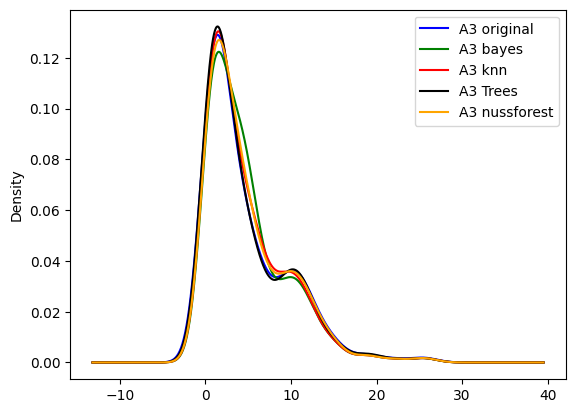

In [72]:
#Plot and compare ther results
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['A3'].plot(kind='kde',ax=ax,color='blue')
X_train_bayes['A3'].plot(kind='kde',ax=ax,color='green')
X_train_knn['A3'].plot(kind='kde',ax=ax,color='red')
X_train_nonlin['A3'].plot(kind='kde',ax=ax,color='black')
X_train_missforest['A3'].plot(kind='kde',ax=ax,color='orange')

#add legends
lines,labels=ax.get_legend_handles_labels()
labels=['A3 original','A3 bayes','A3 knn','A3 Trees','A3 nussforest']
ax.legend(lines,labels,loc='best')
plt.show()

Assembling imputation pipeline with sklearn.
To perform different imputation techniques on different variables

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)

In [74]:
feature_num_arbitrary=['A3','A5']
feature_num_median=['A2','A14']
feature_cat_frequent=['A4','A5','A6','A7']
features_cat_missing=['A1','A9','A10']

#Lets creat differenct imputation transformers using simpleimputer()
imputer_num_arbitrary=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=99)),])
imputer_num_median=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),])
imputer_cat_frequent=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),])
imputer_cat_missing=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='Missing')),])


In [75]:
#Assemble the pipeline
preprocessor=ColumnTransformer(transformers=[('imp_num_arbitrary',imputer_num_arbitrary,feature_num_arbitrary),
                                              ('imp_num_median',imputer_num_median,feature_num_median),
                                              ('imp_cat_frequent',imputer_cat_frequent,feature_cat_frequent),
                                              ('imp_cat_amissing',imputer_cat_missing,features_cat_missing)],remainder='passthrough')

In [76]:
preprocessor.fit(X_train)
X_train=preprocessor.transform(X_train)
X_test=preprocessor.transform(X_test)

Encoding Categorical Data


In [77]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [78]:
import random
data=pd.read_csv('crx.data',header=None)
varnames=['A'+str(s) for s in range(1,17)]
data.columns=varnames
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [79]:

data=data.replace('?',np.nan)
data['A2']=data['A2'].astype('float')
data['A14']=data['A14'].astype('float')
data ['A16']=data['A16'].map({'+':1,'-':0})
cat_cols=[c for c in data.columns if data[c].dtypes=='object']
num_cols=[c for c in data.columns if data[c].dtypes!='object']


In [80]:
data[num_cols]=data[num_cols].fillna(0)
data[cat_cols]=data[cat_cols].fillna('Missing')
#save prepared data
data.to_csv('creditApprovalUCI.csv',index=False)

In [81]:
from sklearn.preprocessing import OneHotEncoder
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=42)
print(X_train['A4'].unique())

tmp=pd.get_dummies(X_train['A4'],drop_first=True)
tmp.head()

['u' 'y' 'Missing' 'l']


,l,u,y
178,0,1,0
265,0,0,1
352,0,0,1
529,0,1,0
409,0,1,0


In [82]:
#To encode all categorical variables at the same time
vars_categorical=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
X_train_enc=pd.get_dummies(X_train[vars_categorical],drop_first=True)
X_test_enc=pd.get_dummies(X_test[vars_categorical],drop_first=True)

In [83]:
X_train_enc.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
178,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
265,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
352,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
529,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
409,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


All categorical variables have been converted into numeric using one hot encoding

In [84]:
#Now use sklearn onehotencoder
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=42)
encoder=OneHotEncoder(categories='auto',drop='first',sparse=False)
encoder.fit(X_train[vars_categorical])
X_train_enc=encoder.transform(X_train[vars_categorical])
X_test_enc=encoder.transform(X_test[vars_categorical])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [85]:
pd.DataFrame(X_train_enc).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Performing one hot encoding on most frequent categories
To reduce number of binary variables, we can perform one hot encoding of the most frequent categoriesonly. One hot encodig of top categories is equivalent to treating the remaining less frequent categories as a single unique category.

In [86]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3, random_state=42)


In [87]:
print(X_train['A6'].unique())
X_train['A6'].value_counts().sort_values(ascending=False)

['q' 'c' 'm' 'aa' 'd' 'ff' 'w' 'x' 'k' 'e' 'i' 'r' 'cc' 'Missing' 'j']


c          98
q          55
w          51
k          42
i          41
ff         40
aa         35
m          26
cc         25
x          23
e          17
d          16
Missing     7
j           6
r           1
Name: A6, dtype: int64

In [88]:
top_5=[cat for cat in X_train['A6'].value_counts().sort_values(ascending=False).head(5).index]

In [89]:
#Lets add a binary variable per top category in train and test set
for category in top_5:
  X_train['A6'+'_'+category]=np.where(X_train['A6']==category,1,0)
  X_test['A6'+'_'+category]=np.where(x_test['A6']==category,1,0)
#Lets output first 10 rows
print(X_train[['A6']+['A6'+'_'+c for c in top_5]].head(10))

     A6  A6_c  A6_q  A6_w  A6_k  A6_i
178   q     0     1     0     0     0
265   c     1     0     0     0     0
352   m     0     0     0     0     0
529   q     0     1     0     0     0
409   q     0     1     0     0     0
588   c     1     0     0     0     0
177  aa     0     0     0     0     0
449   c     1     0     0     0     0
656   c     1     0     0     0     0
83    d     0     0     0     0     0


In [90]:
# Replacing categories with ordinal numbers
from sklearn.preprocessing import OrdinalEncoder

data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)
ordinal_mapping={k: i for i,k in enumerate(X_train['A7'].unique(),0)}
ordinal_mapping

{'v': 0,
 'ff': 1,
 'h': 2,
 'dd': 3,
 'z': 4,
 'bb': 5,
 'j': 6,
 'Missing': 7,
 'n': 8,
 'o': 9}

In [91]:
X_train['A7'].head()

596     v
303     v
204     v
351    ff
118     v
Name: A7, dtype: object

In [92]:
# Now replace categories with numbers in ordinal mapping
X_train['A7']=X_train['A7'].map(ordinal_mapping)
X_test['A7']=X_test['A7'].map(ordinal_mapping)
print(X_train['A7'].head(10))

596    0
303    0
204    0
351    1
118    0
247    2
652    0
513    3
230    0
250    4
Name: A7, dtype: int64


#Frequency encoding
Replace the categories with the counts or percentage of observations with that cateroy. That is if 20 out of 100 shoulw category red for variable color we would replace red with 20 when dound count encoding or 0.2 when doing frequency encoding.  
  - If two different categories are present in the same percentage of observations, they will be replaced by same value which may lead to information loss.

In [93]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)
count_map=X_train['A7'].value_counts().to_dict()
frequency_map=(X_train['A6'].value_counts()/len(X_train)).to_dict()
count_map

{'v': 277,
 'h': 101,
 'ff': 41,
 'bb': 39,
 'z': 7,
 'dd': 5,
 'j': 5,
 'Missing': 4,
 'n': 3,
 'o': 1}

In [94]:
X_train['A7']=X_train['A7'].map(count_map)
x_test['A7']=X_test['A7'].map(count_map)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,277,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,277,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,277,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,41,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,277,14.000,t,t,6,t,g,360.0,1332


In [95]:
# Apply to every categorical variable
#create functions
def count_mapping(df,variable):
  return df[variable].value_counts().to_dict()

def frequency_mapping(df,variable):
  return (df[variable].value_counts()/len(df)).to_dict()

def encode(train,test,variable,mapping):
  X_train[variable]=X_train[variable].map(mapping)
  x_test[variable]=X_test[variable].map(mapping)

vars_categorical=['A1','A4','A5','A6','A7','A9','A10','A12','A13']

for variable in vars_categorical:
  mapping=count_mapping(X_train,variable)
  encode(X_train,X_test,variable,mapping)

If there are categories in the test set that were not present in trian set,the transformer will replace those with np.nan and return warning.A good idea is to group infrequent labels in rare categories.

Encoding with integers in an ordered manner.
  - Calculate the mean value of the target per category
  - Orger the categories from the one with the lowest to the one with the highest target mean value.
  - Assign digits to the ordered categories, starting with 0 to the first category all of the way up to k-1 to the laast category, where k is the number of distinct categories.

This encoding creates a monotonic relationship between the categorical variable and the response and therefor makes the variables more adequate for use in linear models.

In [96]:
data=pd.read_csv('creditApprovalUCI.csv')
data.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


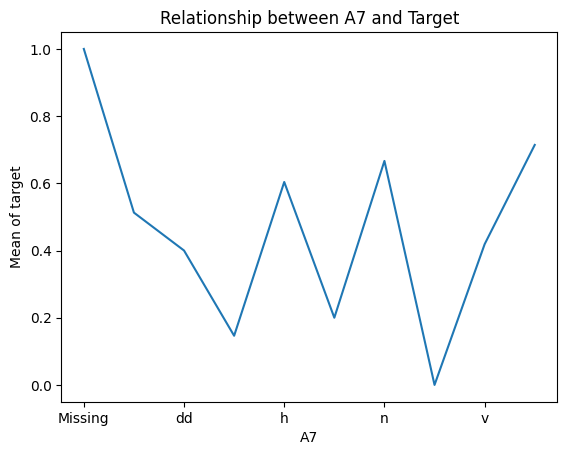

In [97]:

X_train,X_test,y_train,y_test=train_test_split(data,data['A16'],test_size=0.3,random_state=0)
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and Target')
plt.ylabel('Mean of target')
plt.show()

In [98]:
ordered_labels=X_train.groupby(['A7'])['A16'].mean().sort_values().index
print(ordered_labels)

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')


In [99]:
#create a dictinary of category to integer
# here we have to create swapped dictionary as we want ordered integer on right side and categories on left side of the dictionary so that we can map categories to integers.
ordinal_mapping={k: i for i, k in enumerate(ordered_labels,0)}
print(ordinal_mapping)

{'o': 0, 'ff': 1, 'j': 2, 'dd': 3, 'v': 4, 'bb': 5, 'h': 6, 'n': 7, 'z': 8, 'Missing': 9}


In [100]:
X_train['A7']=X_train['A7'].map(ordinal_mapping)
X_test['A7']=X_test['A7'].map(ordinal_mapping)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
596,a,46.08,3.000,u,g,c,4,2.375,t,t,8,t,g,396.0,4159,1
303,a,15.92,2.875,u,g,q,4,0.085,f,f,0,f,g,120.0,0,0
204,b,36.33,2.125,y,p,w,4,0.085,t,t,1,f,g,50.0,1187,1
351,b,22.17,0.585,y,p,ff,1,0.000,f,f,0,f,g,100.0,0,0
118,b,57.83,7.040,u,g,m,4,14.000,t,t,6,t,g,360.0,1332,1


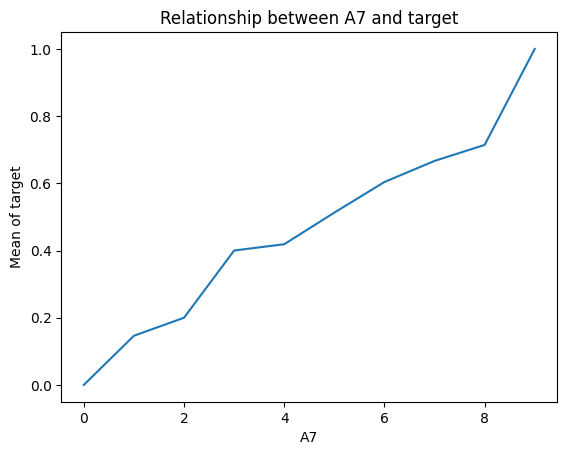

In [101]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and target')
plt.ylabel('Mean of target')
plt.show()

Grouping rare or infrequent categories
Typically any value below 5% can be considered rare.

In [102]:
data =pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)
#check frequency of categories of A7
X_train['A7'].value_counts()/len(X_train)

v          0.573499
h          0.209110
ff         0.084886
bb         0.080745
z          0.014493
dd         0.010352
j          0.010352
Missing    0.008282
n          0.006211
o          0.002070
Name: A7, dtype: float64

In [103]:
#if we consider as rare those labels present in less than 5% of the observations then x,dd,j,missing,n and 0 are rare categories
def find_frequent_labels(df,variable,tolerance):
  temp=df[variable].value_counts()/len(df)
  frequent=[x for x in temp.loc[temp>tolerance].index.values]
  return frequent
frequent_cat=find_frequent_labels(X_train,'A7',0.05)
print(frequent_cat)

['v', 'h', 'ff', 'bb']


In [104]:
#Replace rare categories
X_train['A7']=np.where(X_train['A7'].isin(frequent_cat),X_train['A7'],'Rare')
X_test['A7']=np.where(X_test['A7'].isin(frequent_cat),X_test['A7'],'Rare')

In [105]:
X_train['A7'].value_counts()/len(X_train)

v       0.573499
h       0.209110
ff      0.084886
bb      0.080745
Rare    0.051760
Name: A7, dtype: float64

Binary Encoding
Binary encoding is an alternative categorical encoding technique that uses binary code to represent different categories of the variable.
First the categories are arbitrarily replaced by ordinal numbers then those numbers are converted to binary code

In [106]:
from category_encoders import BinaryEncoder

In [107]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)


In [108]:
X_train['A7'].unique()

array(['v', 'ff', 'h', 'dd', 'z', 'bb', 'j', 'Missing', 'n', 'o'],
      dtype=object)

In [109]:
encoder=BinaryEncoder(cols=['A7'],drop_invariant=True)
encoder.fit(X_train)

BinaryEncoder(cols=['A7'], drop_invariant=True,
              mapping=[{'col': 'A7',
                        'mapping':      A7_0  A7_1  A7_2  A7_3
 1      0     0     0     1
 2      0     0     1     0
 3      0     0     1     1
 4      0     1     0     0
 5      0     1     0     1
 6      0     1     1     0
 7      0     1     1     1
 8      1     0     0     0
 9      1     0     0     1
 10     1     0     1     0
-1      0     0     0     0
-2      0     0     0     0}])

In [110]:
X_train_enc=encoder.transform(X_train)
X_test_enc=encoder.transform(X_test)
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7_0,A7_1,A7_2,A7_3,A8,A9,A10,A11,A12,A13,A14,A15
14,a,45.83,10.50,u,g,q,0,0,0,1,5.000,t,t,7,t,g,0.0,0
586,b,64.08,20.00,u,g,x,0,0,1,1,17.500,t,t,9,t,g,0.0,1000
140,a,31.25,3.75,u,g,cc,0,0,1,1,0.625,t,t,9,t,g,181.0,0
492,b,39.25,9.50,u,g,m,0,0,0,1,6.500,t,t,14,f,g,240.0,4607
350,a,26.17,2.00,u,g,j,0,1,1,1,0.000,f,f,0,t,g,276.0,1


FEATURE HASHING

In [111]:
from category_encoders import HashingEncoder
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)

In [112]:
X_train['A7'].unique()

array(['v', 'ff', 'h', 'dd', 'z', 'bb', 'j', 'Missing', 'n', 'o'],
      dtype=object)

In [113]:
encoder=HashingEncoder(cols=['A7'],n_components=4)
encoder.fit(X_train)

HashingEncoder(cols=['A7'], max_process=1, max_sample=483, n_components=4)

In [114]:
X_train_enc=encoder.transform(X_train)
X_test_enc=encoder.transform(X_test)
X_train_enc.head()

,col_0,col_1,col_2,col_3,A1,A2,A3,A4,A5,A6,A8,A9,A10,A11,A12,A13,A14,A15
596,0,0,1,0,a,46.08,3.000,u,g,c,2.375,t,t,8,t,g,396.0,4159
303,0,0,1,0,a,15.92,2.875,u,g,q,0.085,f,f,0,f,g,120.0,0
204,0,0,1,0,b,36.33,2.125,y,p,w,0.085,t,t,1,f,g,50.0,1187
351,0,1,0,0,b,22.17,0.585,y,p,ff,0.000,f,f,0,f,g,100.0,0
118,0,0,1,0,b,57.83,7.040,u,g,m,14.000,t,t,6,t,g,360.0,1332


'A7' column has been converted to four columns and original A7 is removed from dataframe.

## Transforming Numerical Variables
Linear and logistic regression assume that the variables are normally distributed. If they are not we have to change their distribution into Gaussian.Commonly used mathematical transformations are log,reciprocal,power,square,and cuberoot transformation, box-cox and yeo jhonson transformations.

In [115]:
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import FunctionTransformer

In [116]:
housing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


To evalute the effect of the information on the variable distribution, we will create a function that takes a dtaframe and a avariable name and plots a histogram next to a Q-Q plot

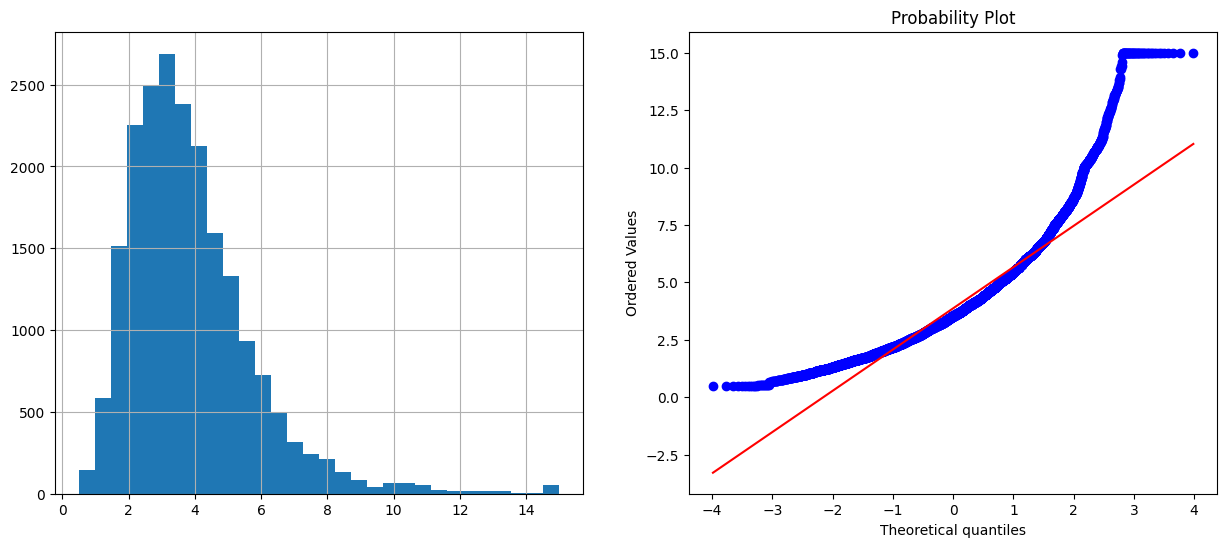

In [118]:
def diagnostic_plots(df,variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  df[variable].hist(bins=30)
  plt.subplot(1,2,2)
  stats.probplot(df[variable],dist='norm',plot=plt)
  plt.show()

diagnostic_plots(data,'MedInc')

The variable is not normally distributed.Lets use log transformation

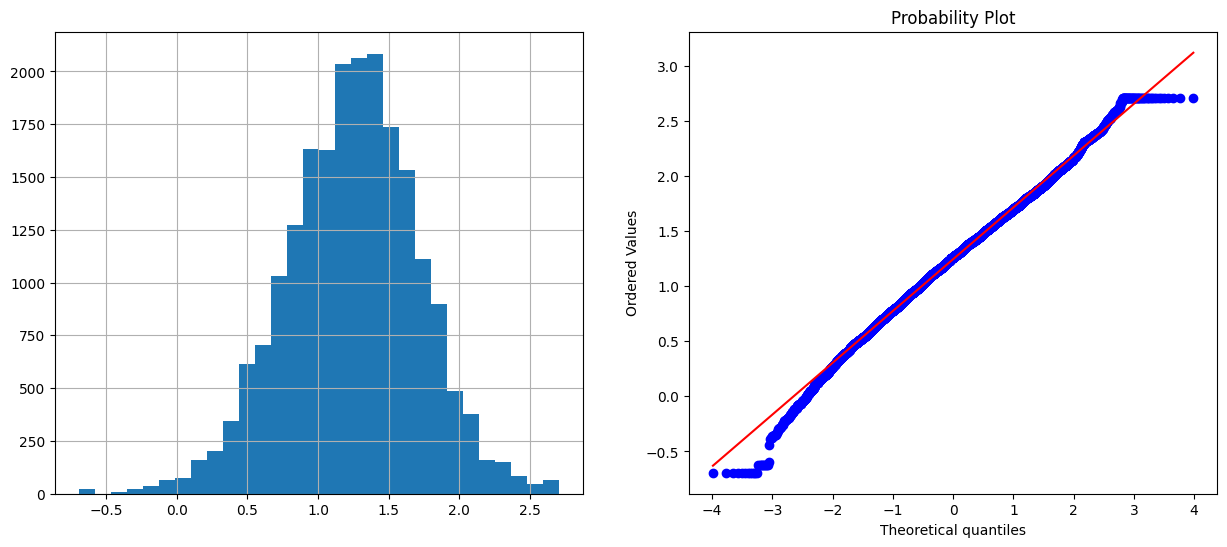

In [119]:
data_tf=data.copy()
data_tf['MedInc']=np.log(data['MedInc'])
diagnostic_plots(data_tf,'MedInc')

In [120]:
data_tf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.119287,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,2.116424,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.982022,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.730434,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.347086,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Reciprocal Function

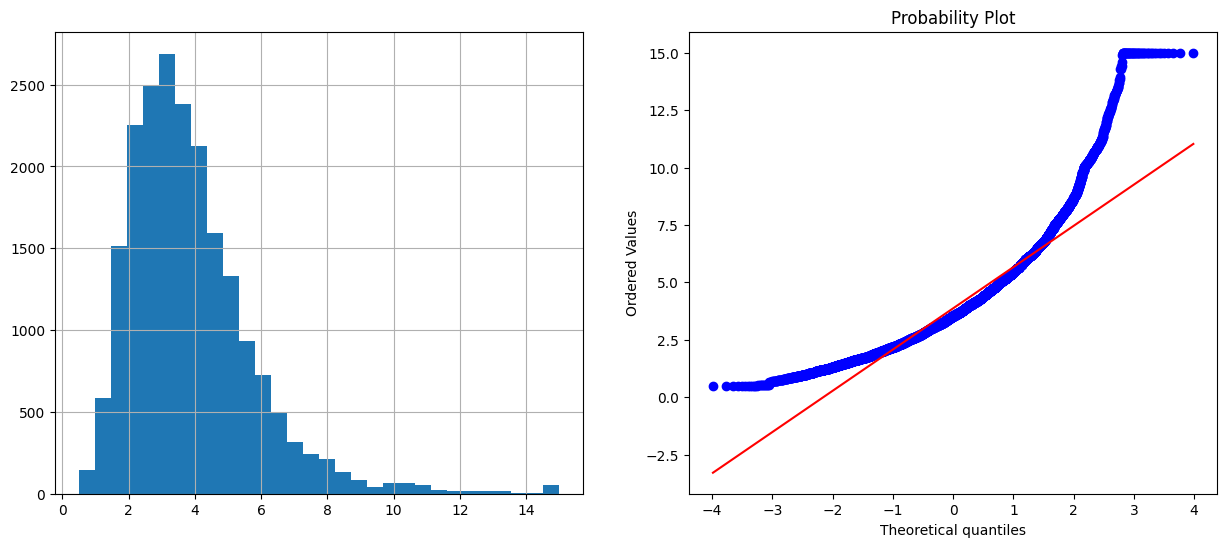

In [121]:
#Defined as 1/x is a strong transformation with a very drastic effect on the variable distribution.
from sklearn.preprocessing import FunctionTransformer
housing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)
diagnostic_plots(data,'MedInc')


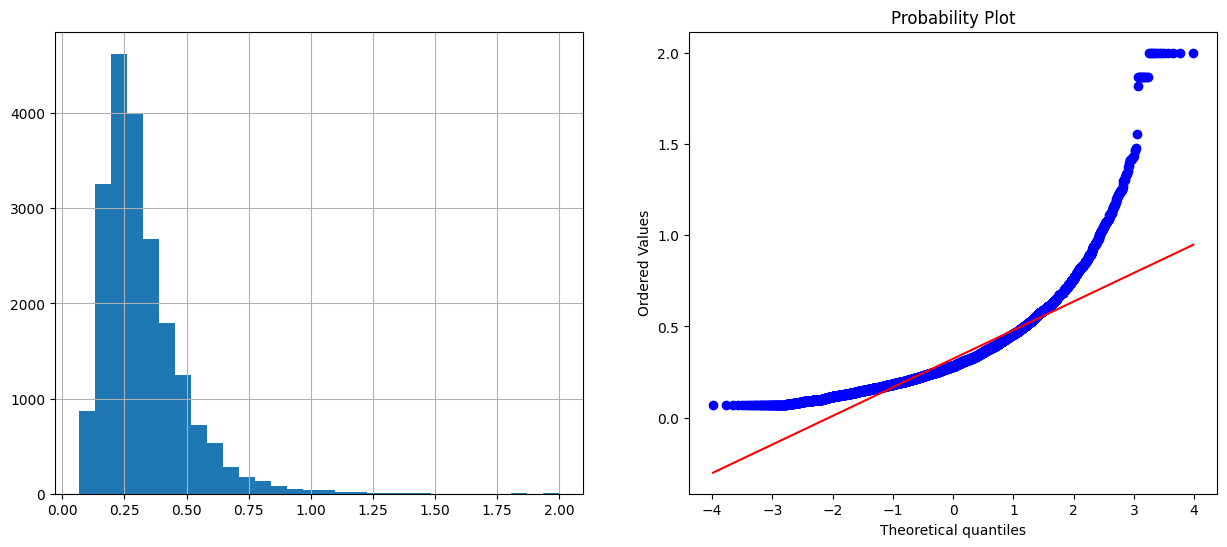

In [122]:
data_c=data.copy()
data_c['MedInc']=np.reciprocal(data_c['MedInc'])
diagnostic_plots(data_c,'MedInc')

In [123]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",skiprows=22, header=None)


In [124]:
boston_dataset=raw_df.copy()
boston_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


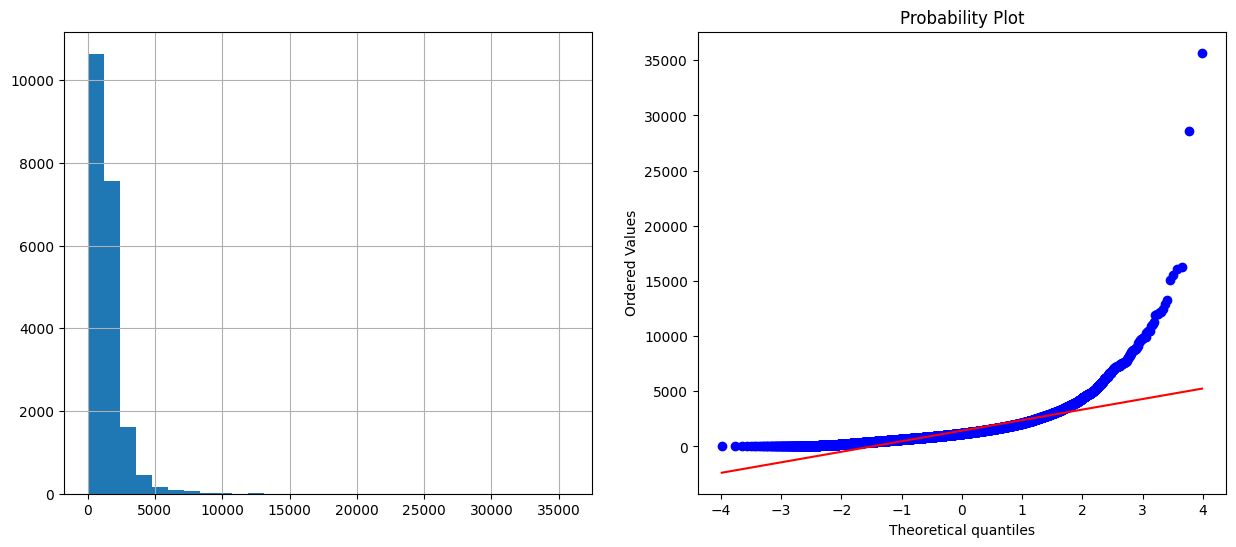

In [125]:
#plot population from california data
diagnostic_plots(data,'Population')

In [126]:
#lets apply square root transformation to population
data['Population']=np.sqrt(data['Population'])


In [127]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,17.944358,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,49.000000,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,22.271057,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,23.622024,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,23.769729,2.181467,37.85,-122.25


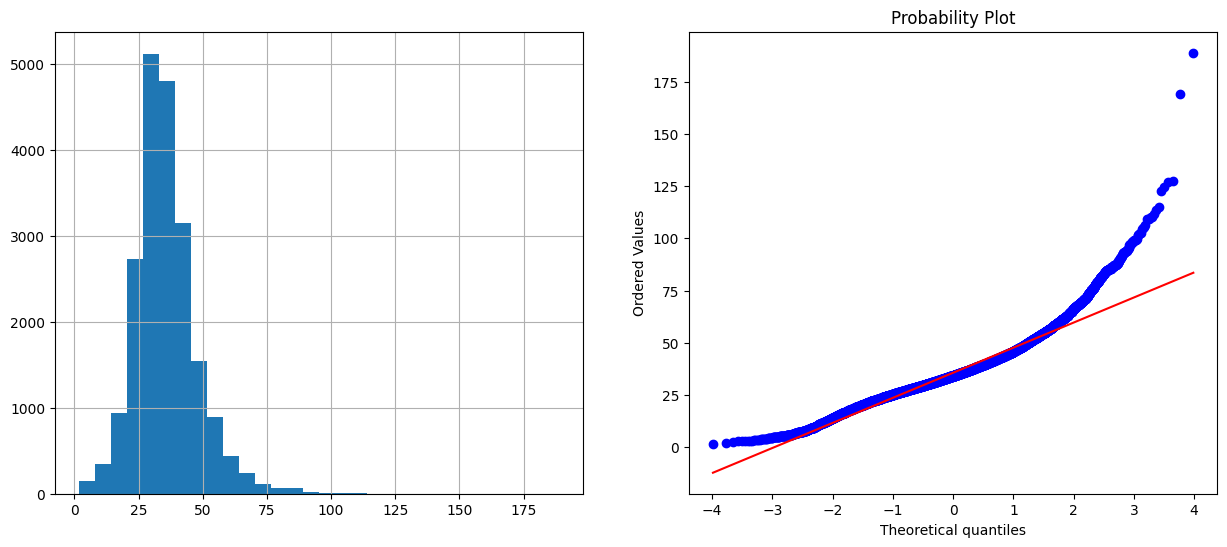

In [128]:
diagnostic_plots(data,'Population')

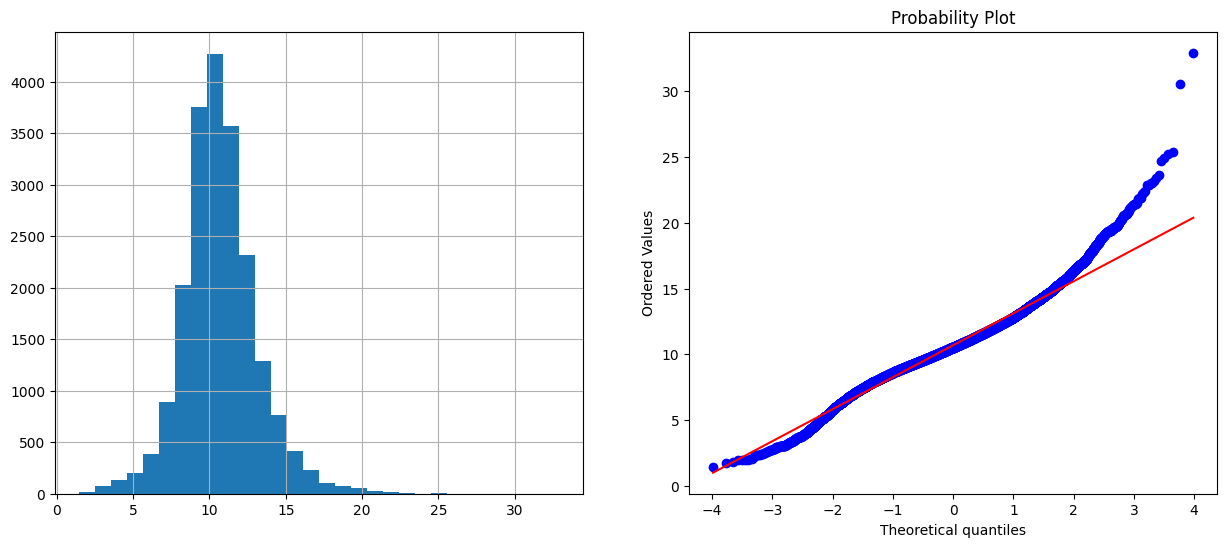

In [129]:
#lets check cube root tranformation
housing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)
data_cube=data.copy()
data_cube['Population']=np.cbrt(data['Population'])
diagnostic_plots(data_cube,'Population')

In [130]:
data_cube.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [131]:
#Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
housing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)


In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [133]:
transformer=PowerTransformer(method='box-cox',standardize=False)
data_cf=transformer.fit(data.drop('Longitude',axis=1))


In [134]:
cols=[col for col in data if col !='Longitude']
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude']

In [135]:
data[cols]=transformer.transform(data[cols])

In [136]:
transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323, -5.21570757])

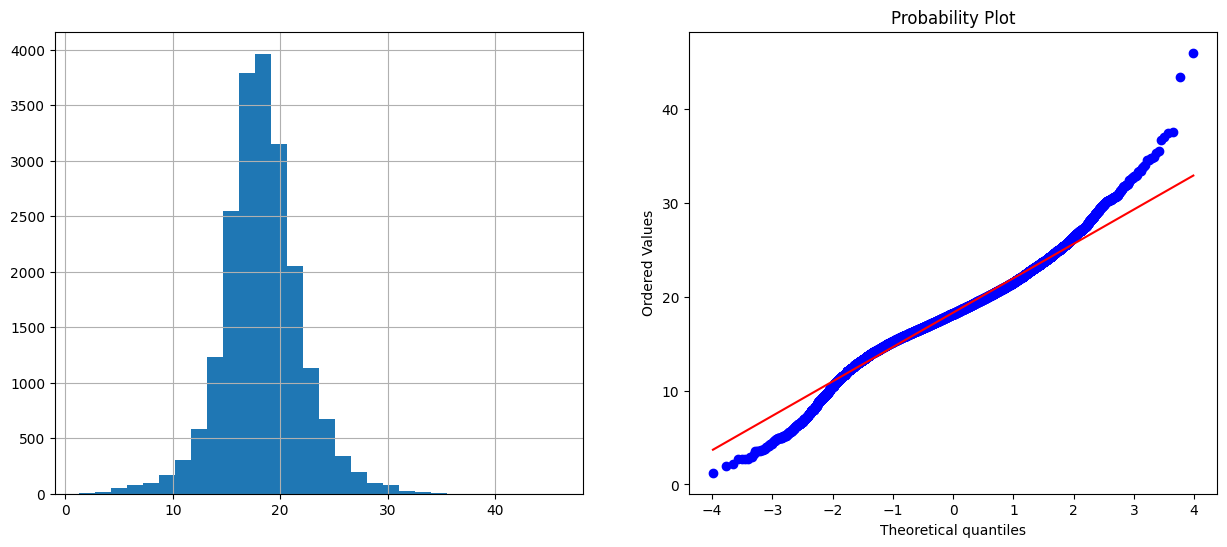

In [137]:
diagnostic_plots(data,'Population')

In [138]:
#Yeo johnson transformation
#can be used for negative values also

housing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)
transformer=PowerTransformer(method='yeo-johnson')


In [139]:
transformer.fit(data)

PowerTransformer()

## Outliers detection
Trimming or truncating is the process of removing observations that show outliers. If the variable is normally distributed, the boundaries are given by the mean plus or minus three times the standard deviation. For normally as well as not normally distributed variables, the limits are determined by inter quartile range.

<Axes: >

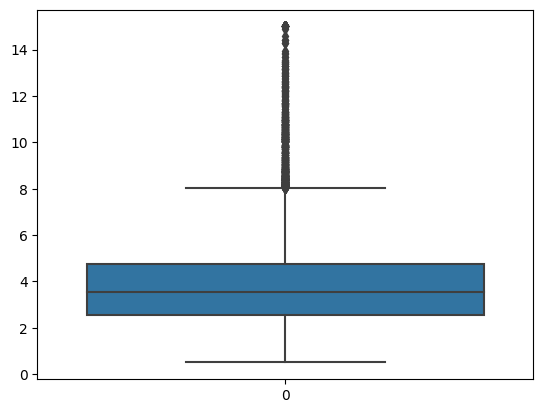

In [143]:
hosing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)
sns.boxplot(data['MedInc'])


In [146]:
#Create function to find boundaries for outliers
def find_boundaries(df,variable,distance):
  IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
  lower_boundary=df[variable].quantile(0.25)-(IQR*distance)
  upper_boundary=df[variable].quantile(0.75)+(IQR*distance)
  return lower_boundary, upper_boundary

In [166]:
Medinc_lower,Medinc_upper=find_boundaries(data,'MedInc',1.5)
Medinc_lower

-0.7063750000000004

In [185]:
#Create vector to flag outliers
#outliers=data.iloc[data['MedInc'].isin(iter(Medinc_lower))]
outliars = data[(data['MedInc']>Medinc_upper) | (data['MedInc']<Medinc_lower)]
outliars

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20
...,...,...,...,...,...,...,...,...
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80
20428,8.7288,6.0,8.715842,1.102970,3385.0,3.351485,34.23,-118.83
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69


In [191]:
data_trimmed=data.iloc[~outliars.index].sort_index()
data_trimmed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
136,6.8538,29.0,6.657993,1.007435,661.0,2.457249,37.83,-122.19
203,1.4844,52.0,3.866667,1.011765,1008.0,3.952941,37.78,-122.23
211,3.9048,52.0,4.998540,1.007299,2273.0,3.318248,37.79,-122.22
212,3.0893,52.0,3.907692,0.974359,600.0,3.076923,37.79,-122.21
213,2.6042,46.0,4.489564,1.091082,1647.0,3.125237,37.79,-122.22


## Winsorization
Process of transforming the data by limiting the extreme values.Exreme values are not removed but are instead replaced by other values.For example, for 90% winzorization we set all data below the 5th percentile to the value at 5th percetile and all data aove the 95th percentile to the value of 95th percentile.

In [194]:
hosing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [197]:
def winsorize(df,variable,upper_limit,lower_limit):
  return np.where(df[variable]>upper_limit,upper_limit,np.where(df[variable]<lower_limit,lower_limit,df[variable]))

data['MedInc']=winsorize(data,'MedInc',data['MedInc'].quantile(0.95),data['MedInc'].quantile(0.05))

<Axes: >

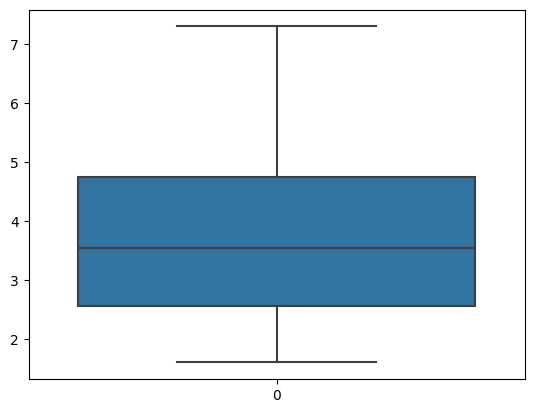

In [199]:
sns.boxplot(data['MedInc'])

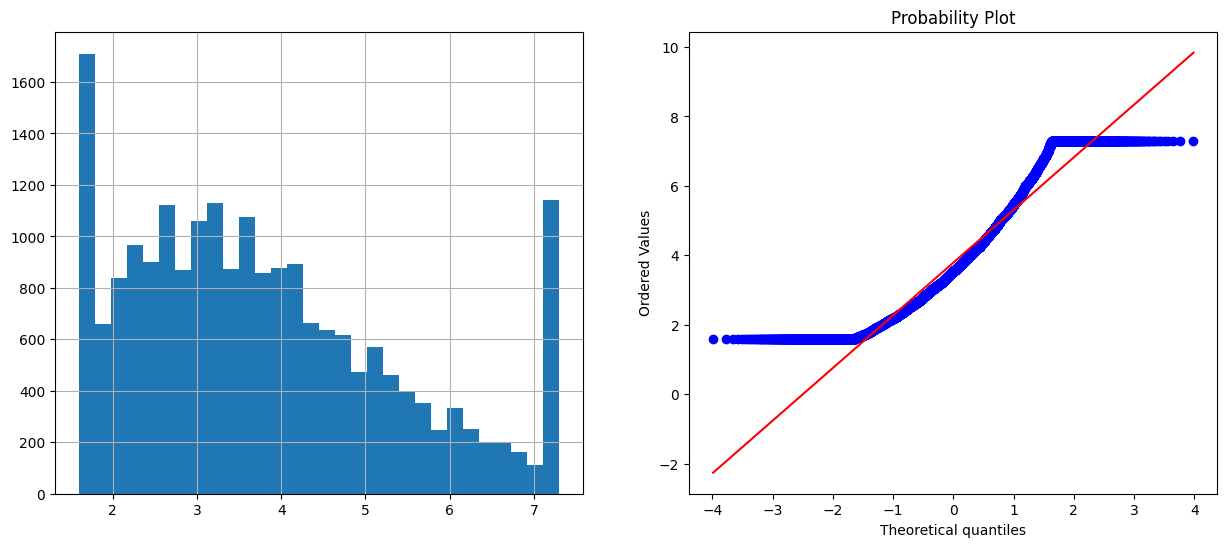

In [202]:
diagnostic_plots(data,'MedInc')

## Performing Feature Scaling
Many machine learning algorithms are sensitive to scale and magnitude of the featueres. The coefficients of the  linear models depend on the scale of the feature, that is changing the feature scale will change the coefficients value. In linear models as well as algorithms that depend on distnace daclulations, such as clusturing and PCA features with bigger value ranges tend to dominate over features with smaller ranges.

In [207]:
housing=fetch_california_housing()
data=pd.DataFrame(housing.data,columns=housing.feature_names)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [213]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data=pd.DataFrame(housing.data,columns=housing.feature_names)
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [215]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
